<a href="https://datamics.com/de/courses/"><img src=../../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Fortgeschrittene Matplotlib Konzepte

In dieser Lektion werden wir einige fortgeschrittene Themen behandeln, die man üblicherweise nicht so häufig braucht, wie die bereits gelernten Grundlagen. Für mehr Informationen könnt ihr immer auf die offizielle Dokumentation zurückgreifen. Letzteres ist auch im beruflichen Alltag ein nützliches Tool, um sich Funktionalitäten wieder frisch ins Gedächtnis zu rufen.

In [1]:
# Ggf. die Imports und Beispieldaten wiederherstellen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

x = np.linspace(0, 5, 11)
y = x ** 2

### Logarithmischische Skala

Wir können auf eine oder beide Achsen auch logarithmische Skalen legen. Diese Funktionalität ist im Endeffekt nur eine Anwendung einer allgemeineren Transformation im Matplotlib System. Jede Achse kann individuell per `set_xscale` bzw. `set_yscale` definiert werden. Diese Methode akzeptiert ein Argument. In diesem Fall das Argument *log*.

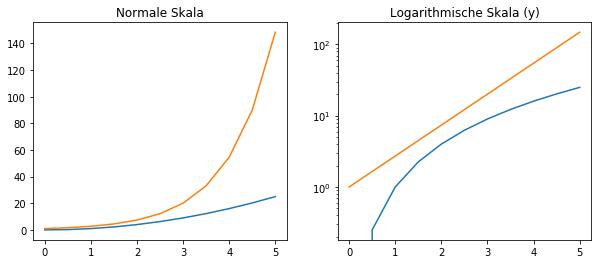

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normale Skala")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmische Skala (y)");

## Platzierung von Teilstrichen und benutzerdefinierte Teilstrich-Bezeichnungen

Wir können explizit bestimmen wo wir die Teilstriche einer Achse setzen möchten. Dazu verwendet man `set_xticks` und `set_yticks`, welche beide eine Liste an Werten als Argument aufnehmen. Zusätzlich können wir die `set_xticklabels`und `set_yticklabels` Methode verwenden, um benutzerdefinierte Beschriftungen zu den Teilstrichen hinzuzufügen.

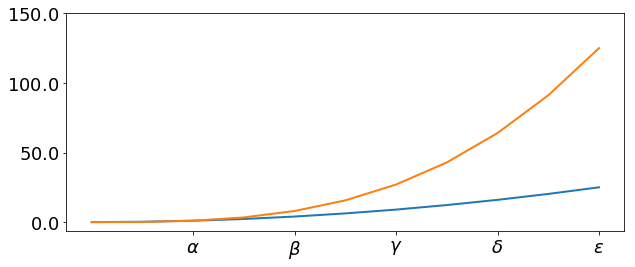

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # LaTeX formatierte Beschriftung

Es gibt viele weitere Methoden, um die Teilstriche und deren Beschriftung festzulegen. Dazu gehören verschiedene automatische Verfahren zur Festlegung der Teilstriche. Eine Übersicht findest du auf http://matplotlib.org/api/ticker_api.html.

### Wissenschaftliche Schreibweise
Mit großen Zahlen auf den Achsen ist es häufig nützlicher die wissenschaftliche Schreibweise zu verwenden:

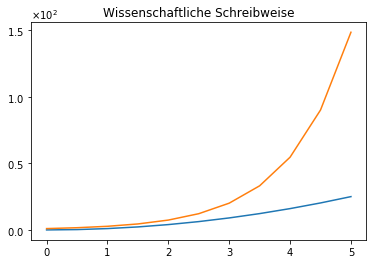

In [4]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Wissenschaftliche Schreibweise")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

## Achsen
### Achsenzahl- und Achsenbeschriftungsabstand

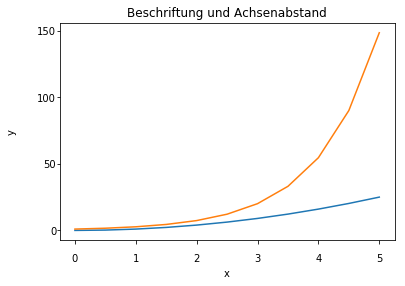

In [5]:
# Abstand zwischen x und y Achse und den Zahlen auf der Achse
matplotlib.rcParams['xtick.major.pad'] = 10
matplotlib.rcParams['ytick.major.pad'] = 0

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Beschriftung und Achsenabstand")

# Abstand zwischen Achsenbeschriftung und Achsenzahl
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 20

ax.set_xlabel("x")
ax.set_ylabel("y");

In [6]:
# Standards wiederherstellen
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

### Achsenposition-Anpassung

Leider passiert es manchmal, wenn wir Diagramme speichern, dass die Beschriftung abgeschnitten wird. Dann ist es notwendig die Position der Achsen ein wenig anzupassen. Das erledigen wir indem wir `subplots_adjust` nutzen:

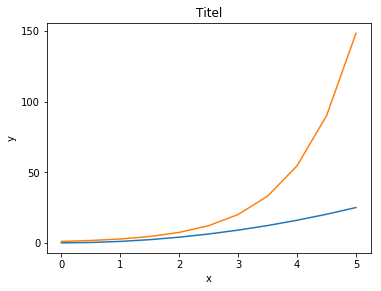

In [7]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Titel")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Achsengitter

Mit der `grid` Methode im Achsenobjekt können wir Gitter- bzw. Hilfslinien ein und ausschalten. Wir können außerdem deren Darstellung anpassen. Dafür verwendet man die gleichen Stichworte wie für die Graphen.

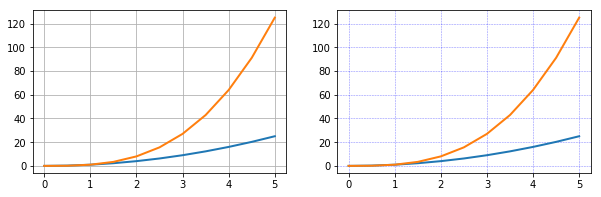

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Standard Gitternetz Darstellung
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# Benutzerdefinierte Gitternetz Darstellung
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Achsenlinien

Wir können außerdem die Eigenschaften unserer Achsenlinien bearbeiten:

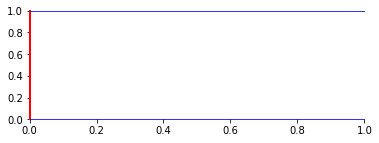

In [9]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# Die Linie der rechten Achse ausschalten
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # Nur links Teilstriche anzeigen

### Doppel-Achsen

Manchmal ist es nützlich eine zusätzliche Achse in einem Diagramm darzustellen. Zum Beispiel, wenn wir Kurven mit unterschiedlichen Einheiten gemeinsam darstellen möchten. Motplotlib bietet diese Möglichkeit durch die `twinx` und `twiny` Funktionen:

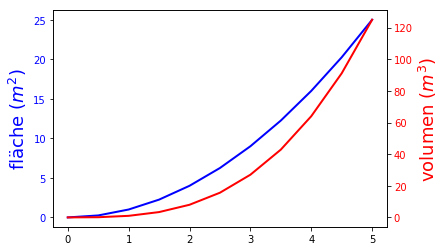

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"fläche $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volumen $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Achsen bei denen x und y gleich Null sind

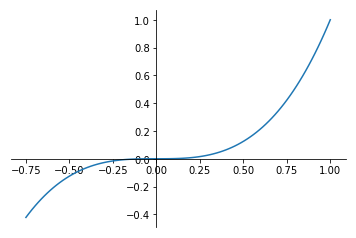

In [11]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # Position der x Achse zu x = 0 setzen

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # Position der y Achse zu y = 0 setzen

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Andere 2D Diagramm Arten

Zusätzlich zur normalen `plot` Methode gibt es weitere Funktionen um verschiedene andere Arten von Diagrammen zu erzeugen. Auf der offiziellen Matplotlib-Webseite erhält man eine holistische Übersicht der Diagrammarten unter http://matplotlib.org/gallery.html. Einige der nützlichsten schauen wir jetzt an:

In [12]:
n = np.array([0,1,2,3,4,5])

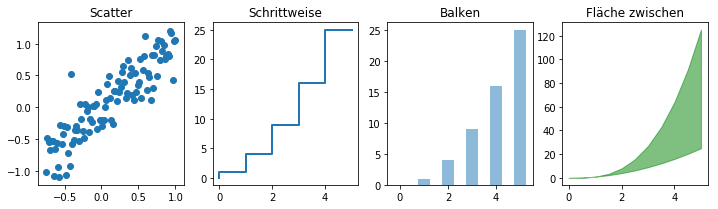

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("Scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("Schrittweise")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("Balken")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("Fläche zwischen");

## Text Anmerkungen

Anmerkungen können wir in Matplotlib durch die `text` Funktion hinzufügen. Dabei wird die LaTeX Formatierung unterstützt, genau wie bei den Achsenbeschriftungen und Titeln.

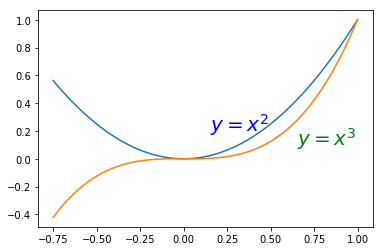

In [14]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Diagramme mit mehreren Subdiagrammen und Einfügungen

Achsen können der Matplotlib Arbeitsfläche manuell durch `fig.add_axes` oder durch Subdiagramm Layout Manager wie `subplots`, `subplot2grid` und `gridspec` hinzugefügt werden.

### subplots

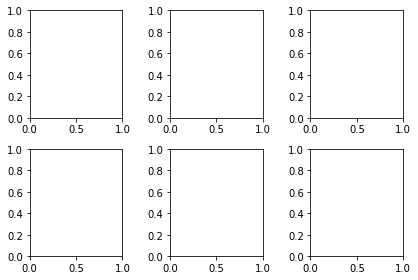

In [15]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

### subplot2grid

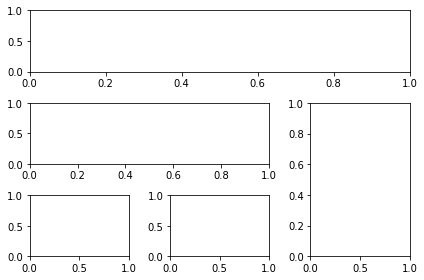

In [16]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### gridspec

In [17]:
import matplotlib.gridspec as gridspec

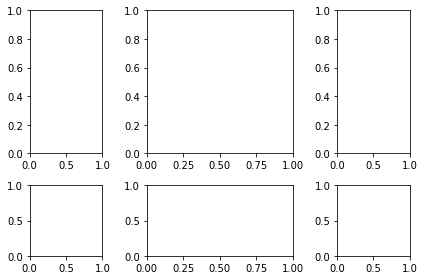

In [18]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### add_axes

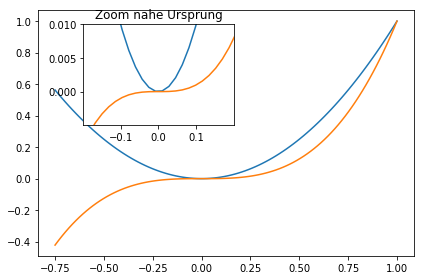

In [19]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('Zoom nahe Ursprung')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Farbkarte und Kontur Diagramme

Farbkarten und Kontur Diagramme sind nützlich um Funktionen mit zwei Variablen darzustellen. In den meisten dieser Funktionen nutzen wir die Farbkarte um eine Dimension der Daten zu kodieren.

Es gibt eine Auswahl an vordefinierten Farbkarten. Dabei ist es relativ selbsterklärend eine benutzerdefinierte Karte auszuwählen. Eine Übersicht vordefinierter Farbkarten findest du auf: https://matplotlib.org/examples/color/colormaps_reference.html.

In [20]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [21]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

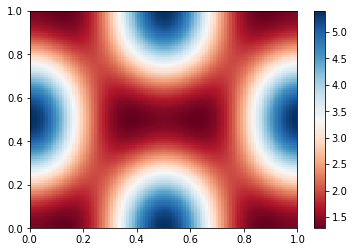

In [22]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

### imshow

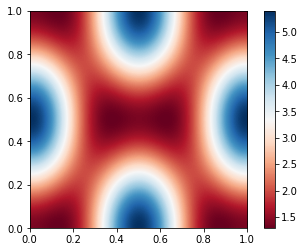

In [23]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

### Konturen

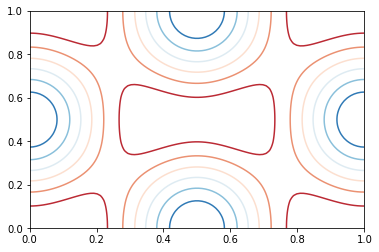

In [24]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D Diagramme

Um 3D Diagramme in Matplotliub zu verwenden müssen wir erst eine Instanz der `Axes3D` Klasse erstellen. Danach können 3D Achsen der Arbeitsfläche von Matplotlib genau so hinzugefügt werden wie 2D Achsen. Oder genauer gesagt: durch Übergabe des `projection=3d` Arguments und die `add_axes` oder `add_subplot` Methode.

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Oberflächen Diagramme

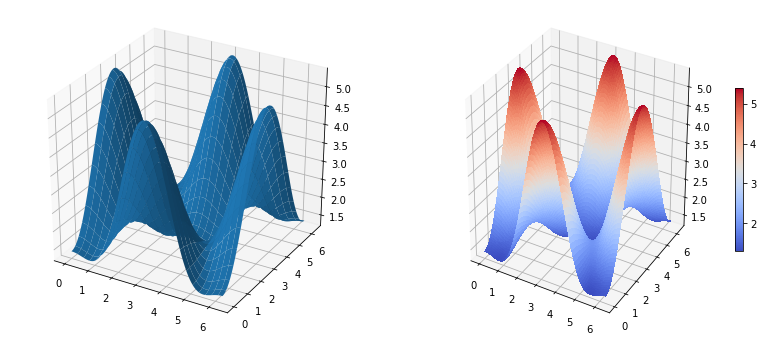

In [26]:
fig = plt.figure(figsize=(14,6))

# "ax" ist eine 3D Achsen Insantz durch das projection="3d" Stichwort
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Oberflächen Diagramm mit Farbgebung und Farbleiste
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### Drahtbügel Diagramm

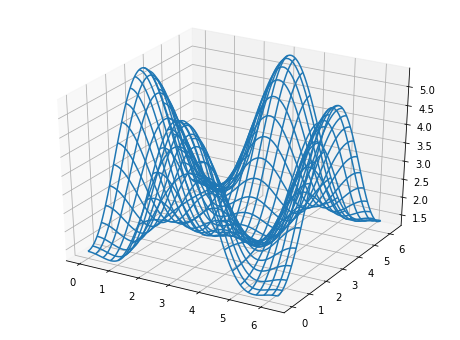

In [27]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### Kontur Diagramm mit Projektionen

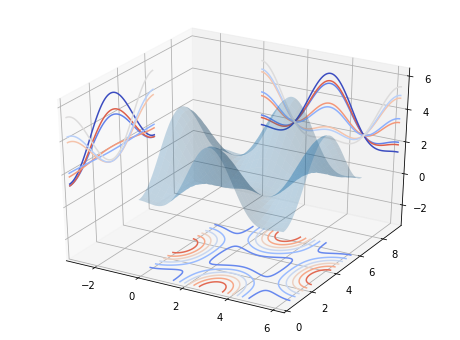

In [28]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Weitere Ressourcen

* http://www.matplotlib.org - Die Webseite von Matplotlib.
* https://github.com/matplotlib/matplotlib - Der Sourcecode zu Matplotlib.
* http://matplotlib.org/gallery.html - Eine große Galerie, die viele Arten von Diagrammen zeigt, die mit Matplotlib erstellbar sind.

# Gut gemacht!